In [1]:
import numpy as np
import pandas as pd
import cv2
import os 
from matplotlib import pyplot as plt
%matplotlib inline 

import keras
from keras.layers import Dense, MaxPooling2D, Convolution2D, Activation, Flatten
from keras.layers import Reshape, UpSampling2D, ZeroPadding2D, Input
from keras.models import Sequential,Model

Using TensorFlow backend.


In [2]:
NC = 16

data_path = './dataset/'
ims = os.listdir(data_path)

select_ims = []
for ix in range(939):
    if '.jpg' in ims[ix] or '.jpeg' in ims[ix]:
        img = cv2.imread(data_path + ims[ix])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #opencv reads images in BGR format, so convert to RGB
        img = cv2.resize(img, (64, 64))
        select_ims.append(img)
        
print (len(select_ims))

939


In [3]:
print (select_ims[10].shape)

(64, 64, 3)


In [4]:
data = np.asarray(select_ims)
print data.shape


(939, 64, 64, 3)


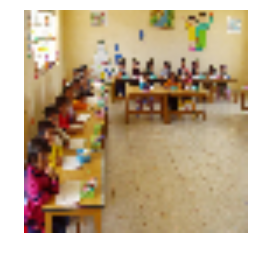

In [5]:
nx = 50
plt.figure(0)
plt.axis("off")
plt.imshow(data[nx])

plt.show()

In [30]:
np.save('image_data', data) #save dataset as numpy file

In [6]:
#store the images in grayscale format in y 
y = np.zeros((data.shape[0], data.shape[1], data.shape[2], 1))

for ix in range(y.shape[0]):
    y[ix] = cv2.cvtColor(data[ix], cv2.COLOR_RGB2GRAY).reshape((64, 64, 1))

print y.shape, y.mean()

(939, 64, 64, 1) 115.943705956


In [7]:
#training and test dataset generation
split = int(0.8 * data.shape[0])

X_train = data[:split]/255.0
X_val = data[split:]/255.0
y_train = y[:split]/255.0
y_val = y[split:]/255.0

print X_train.shape, X_val.shape
print X_train.mean()

(751, 64, 64, 3) (188, 64, 64, 3)
0.449346315139


In [9]:
model = Sequential()

model.add(Convolution2D(64, 3, 3, input_shape=(64, 64, 1), activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 5, 5, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))

# Decode: Deconvolution = zero padding + convolution 
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))

# Unpooling 
model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 62, 62, 64)    640         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 60, 60, 128)   73856       convolution2d_2[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 30, 30, 128)   0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 26, 26, 32)    102432      maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [10]:
hist = model.fit(y_train, X_train,
                nb_epoch=15,
                shuffle=True,
                validation_data=(y_val, X_val), verbose=2)

Train on 751 samples, validate on 188 samples
Epoch 1/15
256s - loss: 0.0801 - acc: 0.3239 - val_loss: 0.0403 - val_acc: 0.4057
Epoch 2/15
239s - loss: 0.0336 - acc: 0.3879 - val_loss: 0.0291 - val_acc: 0.3329
Epoch 3/15
229s - loss: 0.0269 - acc: 0.3807 - val_loss: 0.0247 - val_acc: 0.4453
Epoch 4/15
216s - loss: 0.0230 - acc: 0.4038 - val_loss: 0.0222 - val_acc: 0.3359
Epoch 5/15
215s - loss: 0.0207 - acc: 0.4126 - val_loss: 0.0203 - val_acc: 0.3950
Epoch 6/15
217s - loss: 0.0194 - acc: 0.4222 - val_loss: 0.0190 - val_acc: 0.4095
Epoch 7/15
228s - loss: 0.0191 - acc: 0.4105 - val_loss: 0.0191 - val_acc: 0.3936
Epoch 8/15
220s - loss: 0.0180 - acc: 0.4206 - val_loss: 0.0177 - val_acc: 0.3785
Epoch 9/15
217s - loss: 0.0172 - acc: 0.4229 - val_loss: 0.0173 - val_acc: 0.4214
Epoch 10/15
217s - loss: 0.0171 - acc: 0.4071 - val_loss: 0.0175 - val_acc: 0.3865
Epoch 11/15
217s - loss: 0.0174 - acc: 0.3973 - val_loss: 0.0175 - val_acc: 0.3915
Epoch 12/15
225s - loss: 0.0162 - acc: 0.4250 - va

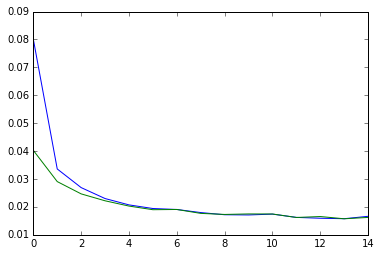

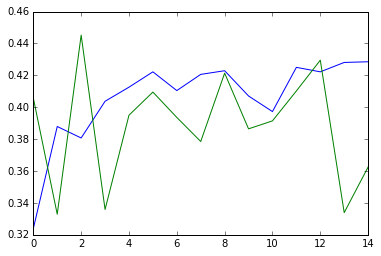

In [11]:
th = hist.history

plt.figure(0)
plt.plot(th['loss'], 'b')
plt.plot(th['val_loss'], 'g')

plt.figure(1)
plt.plot(th['acc'], 'b')
plt.plot(th['val_acc'], 'g')

In [12]:
out = model.predict(y_train[:100])
print out.shape

(100, 64, 64, 3)


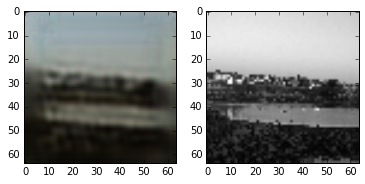

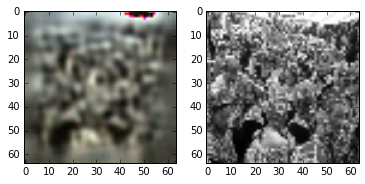

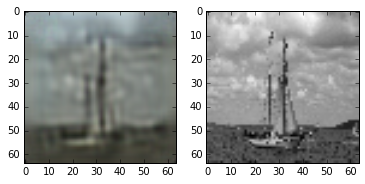

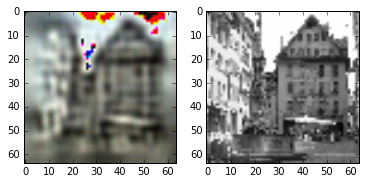

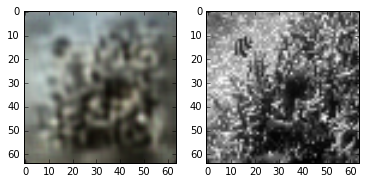

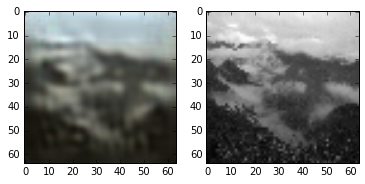

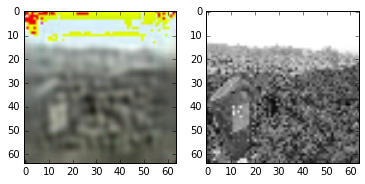

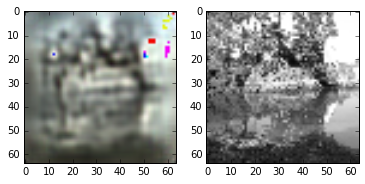

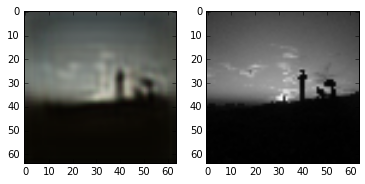

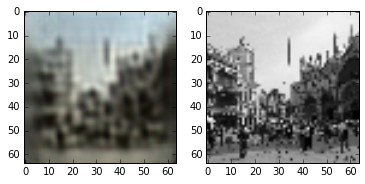

In [13]:
for ix in range(10):
    plt.figure(ix)
    plt.subplot(1, 2, 1)
    plt.imshow(out[ix])
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[ix].reshape(64, 64), cmap='gray')
plt.show()